## Урок 3. Домашнее задание

### 3.1 Задание среднего уровня.

В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff

Все показатели вычисляются по формуле

$$
\frac{\text{new_value}-\text{old_value}}{\text{old_value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

Получается у нас три фичи (датасет трёхмерный) и задача классификации на три класса.

загружаем датасет в память

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
df_source = pd.read_csv('client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


**В рамках домашнего задания**

1. Визуализируйте первый и третий столбец из набора данных `call_diff` и`traffic_diff` в виде scatter
2. Постройте PCA  сожмите их до одномерного случая, визуализируйте результат


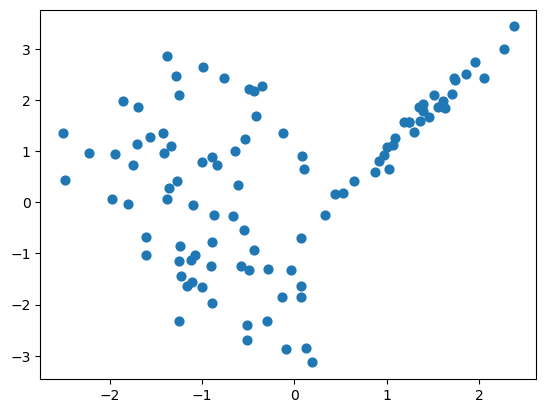

array([[-0.66642088, -0.27353803],
       [-0.88927281, -1.95946861],
       [-0.84150307,  0.72760594],
       [ 1.38974939,  1.78924575],
       [-1.22821053, -1.43420875],
       [-0.11931996,  1.35616198],
       [ 1.23620879,  1.57670459],
       [-0.90744735, -1.25021869],
       [-1.16059805, -1.62842259],
       [-0.76099026,  2.43762353],
       [-1.69791487,  1.86271996],
       [ 0.32890444, -0.23930227],
       [ 0.97431728,  0.9251218 ],
       [ 2.26522832,  2.99312217],
       [-1.35754653,  0.2794614 ],
       [-1.24197713, -0.84751283],
       [ 1.23880773,  1.56455568],
       [ 1.06686075,  1.12087642],
       [-1.3786289 ,  0.06470379],
       [ 1.74407886,  2.39012683],
       [ 0.10075893,  0.64219553],
       [-1.24690633,  2.09951596],
       [-0.5760517 , -1.23914966],
       [ 1.61081926,  1.97220935],
       [ 2.04945536,  2.42895516],
       [ 1.45856895,  1.66939007],
       [-0.51711372, -2.68951609],
       [-0.55004793, -0.54906783],
       [-1.41216815,

In [14]:
# -- ВАШ КОД ТУТ --
import numpy as np
plt.scatter(X[:,0], X[:,2], s=40)
plt.show()
X1= np.stack([X[:,0],X[:,2]]).T
X1

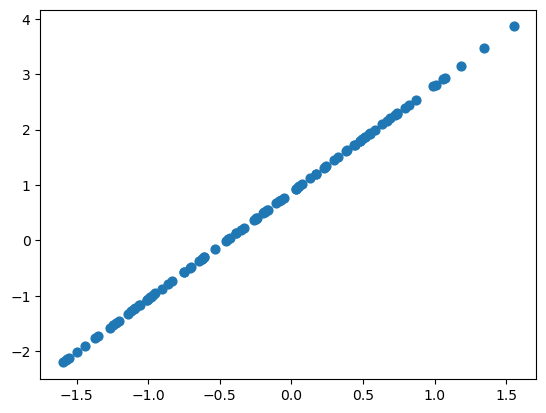

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X1)
X_new = pca.transform(X1)
x_new = pca.inverse_transform(X_new)
plt.scatter(x_new[:,0], x_new[:,1], s=40)
plt.show()

### 3.2 Задание высокого уровня

Сжимать двумерные данные не очень интересно, давайте попробуем применить PCA к трёхмерному датасету и сжать данные до размерности $n=2$.

Для наглядности и визуализируем наши трёхмерные данные в 3D:

AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

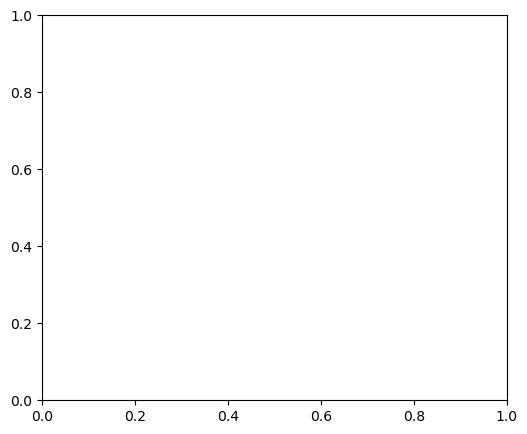

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные. Картинка должна получится примерно такая:
![classification_dim_reduction](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/classification_dim_reduction.png)

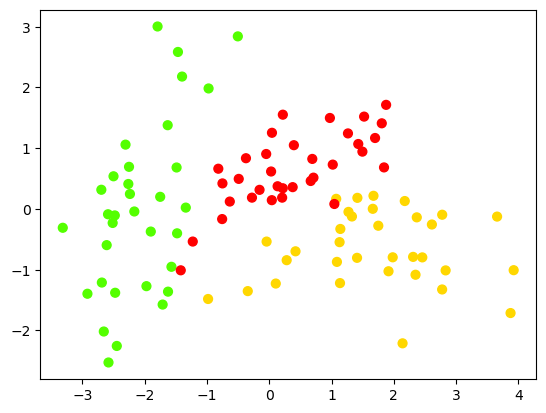

In [37]:
# -- ВАШ КОД ТУТ --
pca = PCA(n_components=2)
X_New = pca.fit_transform(X)
plt.scatter(X_New[:,0], X_New[:,1], s=40, c=y, cmap='prism')
plt.show()


В этом уроке мы научились применять алгоритм PCA  понизили размерность датасета с $n=2$ до $n=1$.

В следующем уроке мы реализуем алгоритм PCA на языке python по шагам.